In [7]:
from sqlalchemy import (Table, Column, String, Integer, Float, Boolean, MetaData)

from sqlalchemy import create_engine


# Creating Database and Tables

In [8]:


engine = create_engine('sqlite:///test.sqlite')
metaobj = MetaData()
employees = Table('employees', metaobj, 
                  Column('id', Integer()),
                  Column('name', String(255)),
                  Column('salary', Float()),
                  Column('active', Boolean())                  
                  )
metaobj.create_all(engine)
engine.table_names()

C:\Users\muham\AppData\Local\Temp\ipykernel_8080\939073153.py:10: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['data', 'employees', 'employees_constrained', 'test']

### Building a table with additional options

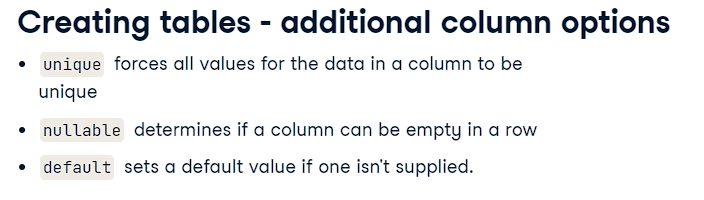

In [9]:
employees_constrained = Table('employees_constrained', metaobj, 
                  Column('id', Integer()),
                  Column('name', String(255), unique = True, nullable= False),
                  Column('salary', Float(), default = 100.00),
                  Column('active', Boolean(), default = True)                  
                  )
metaobj.create_all(engine)
employees_constrained.constraints

{PrimaryKeyConstraint(),
 UniqueConstraint(Column('name', String(length=255), table=<employees_constrained>, nullable=False))}

### Exercise

In [10]:
# Import Table, Column, String, Integer, Float, Boolean from sqlalchemy
from sqlalchemy import Table, Column, String, Integer, Float, Boolean

# Define a new table with a name, count, amount, and valid column: data
metadata = MetaData()
data = Table('data', metadata,
             Column('name', String(255)),
             Column('count', Integer()),
             Column('amount', Float()),
             Column('valid', Boolean())
)

# Use the metadata to create the table
metadata.create_all(engine)

# Print table details
print(repr(data))
print(engine.table_names())


Table('data', MetaData(), Column('name', String(length=255), table=<data>), Column('count', Integer(), table=<data>), Column('amount', Float(), table=<data>), Column('valid', Boolean(), table=<data>), schema=None)
['data', 'employees', 'employees_constrained', 'test']


C:\Users\muham\AppData\Local\Temp\ipykernel_8080\2638319629.py:18: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


# Inserting data into a table

### Inserting single row

In [11]:
from sqlalchemy import insert

stmt = insert(employees_constrained).values(id=1, name='Abid', salary = 1.00, active = True)
result_proxy = engine.execute(stmt)
print(result_proxy.rowcount)

IntegrityError: (sqlite3.IntegrityError) UNIQUE constraint failed: employees_constrained.name
[SQL: INSERT INTO employees_constrained (id, name, salary, active) VALUES (?, ?, ?, ?)]
[parameters: (1, 'Abid', 1.0, 1)]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

### Inserting multiple row


In [ ]:
stmt = insert(employees_constrained)
value_list = [{'id' : 2, 'name': 'Rebecca', 'salary': 2.00, 'active': True},
              {'id' : 3, 'name': 'Bob', 'salary': 0.00, 'active': False}]

# result_proxy = engine.execute(stmt, value_list) 



### Checking the table

In [ ]:
from sqlalchemy import select

query = select([employees_constrained]) # selecting all of the column in census table
results = engine.execute(query).fetchall()
results

[(1, 'Abid', 1.0, True), (2, 'Rebecca', 2.0, True), (3, 'Bob', 0.0, False)]

### Loading a CSV into a table

In [12]:
# import pandas
import pandas as pd

# read census.csv into a DataFrame : census_df
census_df = pd.read_csv('census.csv', header=None)

# rename the columns of the census DataFrame
census_df.columns = ['state', 'sex', 'age', 'pop2000', 'pop2008']

In [13]:
census_df

,state,sex,age,pop2000,pop2008
0,Illinois,M,0,89600,95012
1,Illinois,M,1,88445,91829
2,Illinois,M,2,88729,89547
3,Illinois,M,3,88868,90037
4,Illinois,M,4,91947,91111
...,...,...,...,...,...
8767,Texas,F,81,35378,44418
8768,Texas,F,82,33852,41838
8769,Texas,F,83,30076,40489
8770,Texas,F,84,27961,36821


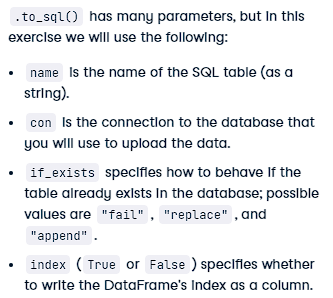

In [14]:
# append the data from census_df to the "census" table via connection
census_df.to_sql(name='test',  #name of the SQL
                  con=engine, 
                  if_exists='replace', 
                  index=False)

8772

In [15]:
from sqlalchemy import select

test = Table('test', metadata, autoload = True, autoload_with = engine)
query = select([test]) # selecting all of the column in census table
results = engine.execute(query).fetchall()
results

[('Illinois', 'M', 0, 89600, 95012),
 ('Illinois', 'M', 1, 88445, 91829),
 ('Illinois', 'M', 2, 88729, 89547),
 ('Illinois', 'M', 3, 88868, 90037),
 ('Illinois', 'M', 4, 91947, 91111),
 ('Illinois', 'M', 5, 93894, 89802),
 ('Illinois', 'M', 6, 93676, 88931),
 ('Illinois', 'M', 7, 94818, 90940),
 ('Illinois', 'M', 8, 95035, 86943),
 ('Illinois', 'M', 9, 96436, 86055),
 ('Illinois', 'M', 10, 97280, 86565),
 ('Illinois', 'M', 11, 94029, 86606),
 ('Illinois', 'M', 12, 92402, 89596),
 ('Illinois', 'M', 13, 89926, 91661),
 ('Illinois', 'M', 14, 90717, 91256),
 ('Illinois', 'M', 15, 92178, 92729),
 ('Illinois', 'M', 16, 90587, 93083),
 ('Illinois', 'M', 17, 92782, 94541),
 ('Illinois', 'M', 18, 90997, 100253),
 ('Illinois', 'M', 19, 89629, 96588),
 ('Illinois', 'M', 20, 91040, 95460),
 ('Illinois', 'M', 21, 85176, 91373),
 ('Illinois', 'M', 22, 84372, 90723),
 ('Illinois', 'M', 23, 85529, 91982),
 ('Illinois', 'M', 24, 84549, 90237),
 ('Illinois', 'M', 25, 87630, 95217),
 ('Illinois', 'M', 26

# Updating data in a table

### Updating single row

In [16]:
from sqlalchemy import update

stmt = update(employees_constrained)
stmt = stmt.where(employees_constrained.columns.id == 3)
stmt = stmt.values(active = True)
result_proxy = engine.execute(stmt)

print(result_proxy.rowcount)

1


In [17]:
from sqlalchemy import select

query = select([employees_constrained]) # selecting all of the column in census table
results = engine.execute(query).fetchall()
results

[(1, 'Abid', 1000.0, True),
 (2, 'Rebecca', 1000.0, True),
 (3, 'Bob', 1000.0, True)]

### Updating multiple row

In [18]:
from sqlalchemy import update

stmt = update(employees_constrained)
stmt = stmt.where(employees_constrained.columns.active == True)
stmt = stmt.values(active = False, salary = 0.00)
result_proxy = engine.execute(stmt)

print(result_proxy.rowcount)

3


In [19]:
from sqlalchemy import select

query = select([employees_constrained]) # selecting all of the column in census table
results = engine.execute(query).fetchall()
results

[(1, 'Abid', 0.0, False), (2, 'Rebecca', 0.0, False), (3, 'Bob', 0.0, False)]

### Fixing the data again


In [20]:
from sqlalchemy import update

stmt = update(employees_constrained)
stmt = stmt.where(employees_constrained.columns.id == 1)
stmt = stmt.values(active = True, salary = 1000.00)
result_proxy = engine.execute(stmt)

print(result_proxy.rowcount)

1


In [21]:
from sqlalchemy import update

stmt = update(employees_constrained)
stmt = stmt.where(employees_constrained.columns.id == 2)
stmt = stmt.values(active = True, salary = 750.00)
result_proxy = engine.execute(stmt)

print(result_proxy.rowcount)

1


In [22]:
from sqlalchemy import update

stmt = update(employees_constrained)
stmt = stmt.where(employees_constrained.columns.id == 3)
stmt = stmt.values(active = True, salary = 550.00)
result_proxy = engine.execute(stmt)

print(result_proxy.rowcount)

1


In [23]:
from sqlalchemy import select

query = select([employees_constrained]) # selecting all of the column in census table
results = engine.execute(query).fetchall()
results

[(1, 'Abid', 1000.0, True),
 (2, 'Rebecca', 750.0, True),
 (3, 'Bob', 550.0, True)]

### Correlated Updates

In [24]:
from sqlalchemy import desc


new_salary = select([employees_constrained.columns.salary])
new_salary = new_salary.order_by(
    desc(employees_constrained.columns.salary)
)
new_salary = new_salary.limit(1)

stmt = update(employees_constrained)
stmt = stmt.values(salary = new_salary)

result_proxy = engine.execute(stmt)
print(result_proxy.rowcount)

3


C:\Users\muham\AppData\Local\Temp\ipykernel_8080\2340237636.py:11: SAWarning: implicitly coercing SELECT object to scalar subquery; please use the .scalar_subquery() method to produce a scalar subquery.
  stmt = stmt.values(salary = new_salary)


In [32]:
from sqlalchemy import select

query = select([employees_constrained]) # selecting all of the column in census table
results = engine.execute(query).fetchall()
results

[(1, 'Abid', 1000.0, True),
 (2, 'Rebecca', 1000.0, True),
 (3, 'Bob', 1000.0, True)]

# Deleting data from a Database

In [27]:
from sqlalchemy import delete, func
stmt = select([func.count(employees_constrained.columns.id)])
engine.execute(stmt).scalar()

3

In [31]:


employees_constrained = Table('employees_constrained', metadata, autoload = True, autoload_with = engine)

delete_stmt = delete(employees_constrained)
result_proxy = engine.execute(delete_stmt)
result_proxy.rowcount

Error closing cursor
Traceback (most recent call last):
  File "c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sqlalchemy\engine\base.py", line 1089, in _commit_impl
    self.engine.dialect.do_commit(self.connection)
  File "c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sqlalchemy\engine\default.py", line 686, in do_commit
    dbapi_connection.commit()
sqlite3.OperationalError: database is locked

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sqlalchemy\engine\base.py", line 1930, in _execute_context
    self._commit_impl(autocommit=True)
  File "c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sqlalchemy\engine\base.py", line 1091, in _commit_impl
    self._handle_dbapi_exception(e, None, None, None, None)
  File "c:\Users\muham\AppData\Local\Programs\Python\Python310\lib

OperationalError: (sqlite3.OperationalError) database is locked
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [29]:
from sqlalchemy import delete

# Begin a transaction
with engine.begin() as connection:
    # Create a delete statement
    delete_stmt = delete(employees_constrained)

    # Execute the delete statement within the transaction
    result_proxy = engine.execute(delete_stmt)

# Check the affected row count
row_count = result_proxy.rowcount
print(f"Deleted {row_count} rows.")

OperationalError: (sqlite3.OperationalError) database is locked
(Background on this error at: https://sqlalche.me/e/14/e3q8)

### DEleting specific rows


In [35]:
stmt = delete(employees_constrained).where(employees_constrained.columns.id == 3)
result_proxy = engine.execute(stmt)
result_proxy.rowcount

Error closing cursor
Traceback (most recent call last):
  File "c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sqlalchemy\engine\base.py", line 1089, in _commit_impl
    self.engine.dialect.do_commit(self.connection)
  File "c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sqlalchemy\engine\default.py", line 686, in do_commit
    dbapi_connection.commit()
sqlite3.OperationalError: database is locked

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sqlalchemy\engine\base.py", line 1930, in _execute_context
    self._commit_impl(autocommit=True)
  File "c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sqlalchemy\engine\base.py", line 1091, in _commit_impl
    self._handle_dbapi_exception(e, None, None, None, None)
  File "c:\Users\muham\AppData\Local\Programs\Python\Python310\lib

OperationalError: (sqlite3.OperationalError) database is locked
(Background on this error at: https://sqlalche.me/e/14/e3q8)

### Dropping a table completely

In [36]:
employees.drop(engine)
print(employees.exists(engine))


OperationalError: (sqlite3.OperationalError) database is locked
[SQL: 
DROP TABLE employees]
(Background on this error at: https://sqlalche.me/e/14/e3q8)

### Dropping all the tables

In [ ]:
metadata.drop_all(engine)
engine.table_names()